In [1]:
import pandas as pd
import ast
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
def convert_string_to_list(string):
    return list(float(num) for num in string.strip('()').split(', '))

def mean_of_lists(group):
    # Stack the arrays vertically
    stacked_arrays = np.vstack(group)
    # Compute the mean along axis 0
    mean_array = np.median(stacked_arrays[:, :3], axis=0)
    return mean_array.tolist()

In [3]:
df1 = pd.read_csv(r'C:\Users\kyles\Desktop\CS5100\Final_Project\5100-final\train_model3_data.csv', header=None)
df2 = pd.read_csv(r'C:\Users\kyles\Desktop\CS5100\Final_Project\5100-final\reformatted_data.csv')

df_test_x = pd.read_csv(r'C:\Users\kyles\Desktop\CS5100\Final_Project\5100-final\fifa_data.csv')
df_test_y = pd.read_csv(r'C:\Users\kyles\Desktop\CS5100\Final_Project\5100-final\fifa_test_ball.csv', header=None)

df3 = df2.copy()

In [4]:
for column in df3.columns:
    if column == 'Pose ID':
        break
        
    df3[column] = df3[column].apply(convert_string_to_list)

In [5]:
for column in df_test_x:
    if column == 'Pose ID':
        break

    df_test_x[column] = df_test_x[column].apply(convert_string_to_list)

In [6]:
mean_df = df3.groupby('Pose ID').agg({col: mean_of_lists for col in df3.columns[:-1]})
mean_df_test = df_test_x.groupby('Pose ID').agg({col: mean_of_lists for col in df_test_x.columns[:-1]})

values = mean_df.values.tolist()
value_test = mean_df_test.values.tolist()

X_arr = np.array(values)
X_arr_test = np.array(value_test)

In [7]:
Y_train = torch.tensor(np.array(df1), dtype=torch.float32)
Y_test = torch.tensor(np.array(df_test_y), dtype=torch.float32)

X_train = torch.tensor(X_arr, dtype=torch.float32)
X_test = torch.tensor(X_arr_test, dtype=torch.float32)

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 120)  # Adjust input_size to 24
        self.fc2 = nn.Linear(120, 80)
        self.fc3 = nn.Linear(80, 50)
        self.fc4 = nn.Linear(50, 20)
        self.fc5 = nn.Linear(20, 5)
        self.fc6 = nn.Linear(5, output_size)  # Make sure output_size is 2

    def forward(self, x):
        # Flatten the input from (batch_size, 8, 3) to (batch_size, 24)
        x = x.view(x.size(0), -1)  # Flattening step
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = torch.sigmoid(self.fc6(x))  # Ensure this is suitable for your problem
        return x

In [9]:
# Uncomment to train

# net = Net(input_size=24, output_size=2)
# 
# loss_fn = nn.BCELoss()
# optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
# 
# Smaller batches for training
# batch_size = len(X_train) // 4
# 
# # Train the network
# for epoch in range(1500):
#     permutation = torch.randperm(X_train.size()[0])
# 
#     for i in range(0, X_train.size(0), batch_size):
#         indices = permutation[i:i + batch_size]
#         batch_x, batch_y = X_train[indices], Y_train[indices]
#         y_pred = net(batch_x)
#         loss = loss_fn(y_pred, batch_y)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
# 
#     if epoch % 100 == 0:
#         print(f'Epoch {epoch}, Loss: {loss.item()}')

In [10]:
# torch.save(net.state_dict(), 'penalty_model.pth')

In [22]:
net = Net(input_size=24, output_size=2)
net.load_state_dict(torch.load('penalty_model.pth'))

<All keys matched successfully>

In [23]:
predictions = []
with torch.no_grad():
    for i in range(len(X_test)):
        y_pred = net(X_test[i].view(1, -1)).numpy()[0]
        predictions.append(y_pred)
        print(f"Predicted output: {y_pred}, Actual output: {Y_test[i].numpy()}")

Predicted output: [0.02386424 0.77361155], Actual output: [0.925      0.60982656]
Predicted output: [0.0720742 0.6132617], Actual output: [0.04038462 0.5565217 ]
Predicted output: [0.08019851 0.5041386 ], Actual output: [0.89178747 0.58064514]
Predicted output: [0.0455803 0.5085594], Actual output: [0.06467181 0.14492753]
Predicted output: [0.93565327 0.2064939 ], Actual output: [0.9355149  0.66570604]
Predicted output: [0.01963713 0.6231979 ], Actual output: [0.0511583  0.17391305]
Predicted output: [0.01899035 0.40640032], Actual output: [0.07899807 0.69452447]
Predicted output: [0.79626167 0.19541232], Actual output: [0.92374516 0.28115943]
Predicted output: [0.01477254 0.77168137], Actual output: [0.03481625 0.11370263]
Predicted output: [0.04006625 0.2681567 ], Actual output: [0.1352657 0.7113703]
Predicted output: [0.11727592 0.08216954], Actual output: [0.09555984 0.6289855 ]
Predicted output: [0.01149922 0.32648724], Actual output: [0.04702495 0.6627907 ]
Predicted output: [0.5

In [34]:
predicted = np.array(predictions)
actual = np.array(df_test_y)
predicted

array([[0.02386424, 0.77361155],
       [0.0720742 , 0.6132617 ],
       [0.08019851, 0.5041386 ],
       [0.0455803 , 0.5085594 ],
       [0.93565327, 0.2064939 ],
       [0.01963713, 0.6231979 ],
       [0.01899035, 0.40640032],
       [0.79626167, 0.19541232],
       [0.01477254, 0.77168137],
       [0.04006625, 0.2681567 ],
       [0.11727592, 0.08216954],
       [0.01149922, 0.32648724],
       [0.55916995, 0.3109996 ],
       [0.07583708, 0.10968004],
       [0.7154118 , 0.1349617 ]], dtype=float32)

In [35]:
actual

array([[0.925     , 0.60982659],
       [0.04038461, 0.55652174],
       [0.89178744, 0.58064516],
       [0.06467181, 0.14492754],
       [0.93551492, 0.66570605],
       [0.0511583 , 0.17391304],
       [0.07899807, 0.6945245 ],
       [0.92374517, 0.28115942],
       [0.03481625, 0.11370262],
       [0.1352657 , 0.71137026],
       [0.09555985, 0.62898551],
       [0.04702495, 0.6627907 ],
       [0.86017358, 0.26666667],
       [0.10241546, 0.73913043],
       [0.91417551, 0.55685131]])

In [33]:
mae = np.mean(np.abs(actual - predicted))
print(f'Mean Absolute Error: {mae:.4f}')

Mean Absolute Error: 0.2568


In [26]:
euclidean_distances = np.linalg.norm(actual - predicted, axis=1)

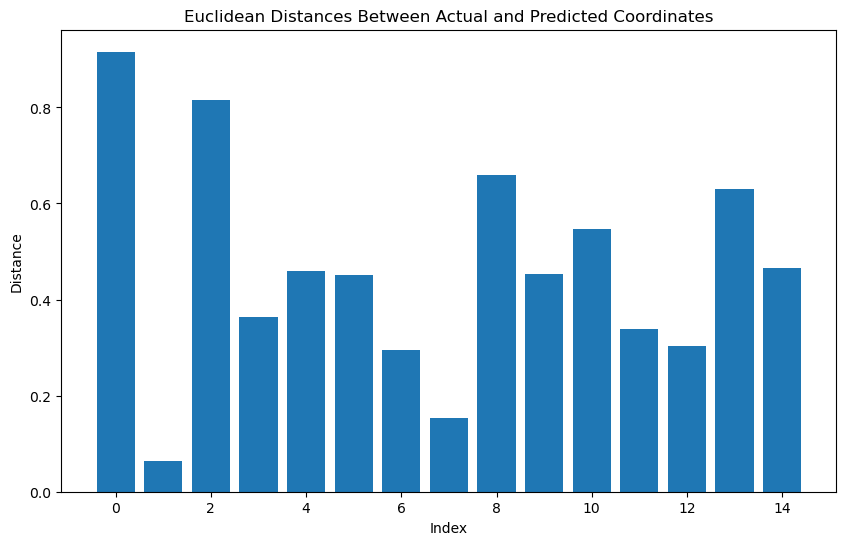

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(euclidean_distances)), euclidean_distances)
plt.title('Euclidean Distances Between Actual and Predicted Coordinates')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.grid(False)
plt.show()

13
8


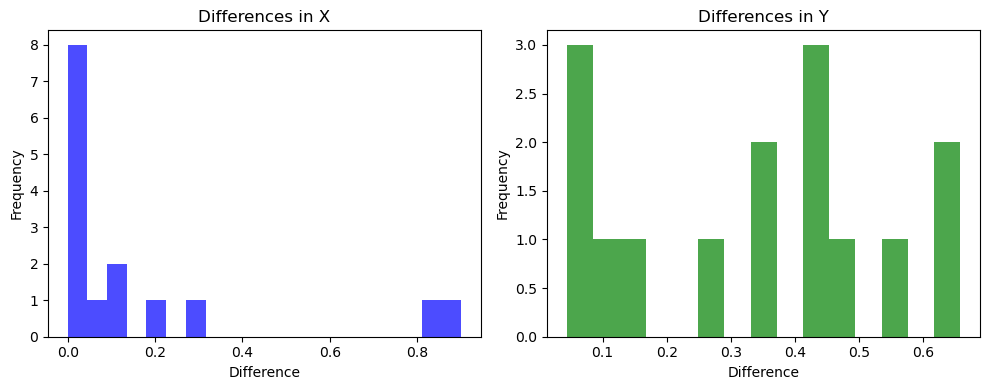

In [43]:
x_differences = np.abs(actual[:, 0] - predicted[:, 0])
print(np.sum(x_differences < .4))
y_differences = np.abs(actual[:, 1] - predicted[:, 1])
print(np.sum(y_differences < .4))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(x_differences, bins=20, color='blue', alpha=0.7)
plt.title('Differences in X')
plt.xlabel('Difference')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y_differences, bins=15, color='green', alpha=0.7)
plt.title('Differences in Y')
plt.xlabel('Difference')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [29]:
x_squared_differences = (actual[:, 0] - predicted[:, 0])**2
y_squared_differences = (actual[:, 1] - predicted[:, 1])**2

total_x_error = np.sum(x_squared_differences)
total_y_error = np.sum(y_squared_differences)
total_error = total_x_error + total_y_error

percent_explained_by_x = (total_x_error / total_error) * 100
percent_explained_by_y = (total_y_error / total_error) * 100

print(f'Percent of total variance explained by x error: {percent_explained_by_x:.4f}%')
print(f'Percent of total variance explained by y error: {percent_explained_by_y:.4f}%')

Percent of total variance explained by x error: 41.6673%
Percent of total variance explained by y error: 58.3327%
